In [26]:
pip install opencv-python-headless --upgrade


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


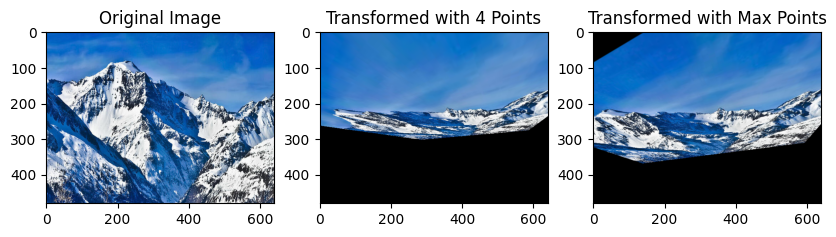

Homography Matrix with 4 Points:
[[ 2.23339024e-01  2.31411281e+00 -2.01462573e+02]
 [-7.32766715e-01  1.52103548e+00  2.34161987e+02]
 [-2.17858354e-03  4.56646407e-03  1.00000000e+00]]
Homography Matrix with Max Points:
[[ 8.30924864e-01  1.18786328e+00 -2.55845776e+02]
 [-6.07784752e-01  1.23347814e+00  2.39124554e+02]
 [-1.29977890e-03  2.61624749e-03  1.00000000e+00]]


In [93]:
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def calculate_homography(points_src, points_dst):
    """ Calculate the homography matrix from source and destination points. """
    if len(points_src) < 4:
        raise ValueError("At least four points are required for a perspective transformation.")
    matrix_A = np.zeros((2 * len(points_src), 8))
    matrix_B = np.zeros(2 * len(points_src))
    for i in range(len(points_src)):
        px, py = points_src[i]
        qx, qy = points_dst[i]
        matrix_A[2 * i] = [px, py, 1, 0, 0, 0, -px * qx, -py * qx]
        matrix_A[2 * i + 1] = [0, 0, 0, px, py, 1, -px * qy, -py * qy]
        matrix_B[2 * i] = qx
        matrix_B[2 * i + 1] = qy
    homography_vector, _, _, _ = np.linalg.lstsq(matrix_A, matrix_B, rcond=None)
    homography_vector = np.append(homography_vector, 1.0)  # Append 1 for the homogeneous coordinate
    return homography_vector.reshape(3, 3)

def show_transformation_results(img_original, img_transformed_four, img_transformed_max, matrix_four, matrix_max):
    """ Display the original and both transformed images with homography matrix details. """
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 3, 1)
    plt.imshow(cv2.cvtColor(img_original, cv2.COLOR_BGR2RGB))
    plt.title('Original Image')
    plt.subplot(1, 3, 2)
    plt.imshow(cv2.cvtColor(img_transformed_four, cv2.COLOR_BGR2RGB))
    plt.title('Transformed with 4 Points')
    plt.subplot(1, 3, 3)
    plt.imshow(cv2.cvtColor(img_transformed_max, cv2.COLOR_BGR2RGB))
    plt.title('Transformed with Max Points')
    plt.show()
    
    print("Homography Matrix with 4 Points:")
    print(matrix_four)
    print("Homography Matrix with Max Points:")
    print(matrix_max)

def fetch_image_data(image_index):
    """ Fetch the image and the corresponding CSV data based on index. """
    file_mapping = {
        1: ('lena.png', 'lena.csv'),
        2: ('water.jpg', 'water.csv'),
        3: ('computer.png', 'computer.csv'),
        4: ('mario.jpg', 'mario.csv'),
        5: ('mountain.jpg', 'mountain.csv')
    }
    img_path, data_path = file_mapping[image_index]
    img = cv2.imread(img_path)
    data = pd.read_csv(data_path)
    data.rename(columns={'x_per': 'x_dst', 'y_per': 'y_dst'}, inplace=True)
    return img, data[['x_og', 'y_og']].to_numpy(), data[['x_dst', 'y_dst']].to_numpy()

def main():
    choice = int(input("Select an image (1-Lena, 2-Water, 3-Computer, 4-Mario, 5-Mountain): "))
    image, points_original, points_destination = fetch_image_data(choice)
    
    num_points = int(input("Enter the number of points for homography (must be at least 4): "))

    if num_points >= 4:
        homography_four = calculate_homography(points_original[:4], points_destination[:4])
        homography_max = calculate_homography(points_original, points_destination)
        
        transformed_image_four = cv2.warpPerspective(image, homography_four, (image.shape[1], image.shape[0]))
        transformed_image_max = cv2.warpPerspective(image, homography_max, (image.shape[1], image.shape[0]))
        
        show_transformation_results(image, transformed_image_four, transformed_image_max, homography_four, homography_max)
    else:
        print("Error: Not enough points. At least 4 points are required.")

if __name__ == "__main__":
    main()
